In [5]:
import pandas as pd

red_wine = pd.read_csv("../data/winequality-red.csv", sep=';')
white_wine = pd.read_csv("../data/winequality-white.csv", sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))

0.7294593034442948
0.7161538461538461


In [8]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)

print(accuracy_score(y_test, y_pred_test))
print(recall_score(y_test, y_pred_test))
print(precision_score(y_test, y_pred_test))
print(roc_auc_score(y_test, y_pred_test))
print(f1_score(y_test, y_pred_test))

0.7161538461538461
0.7314702308626975
0.8026666666666666
0.7105988470875331
0.7654164017800381


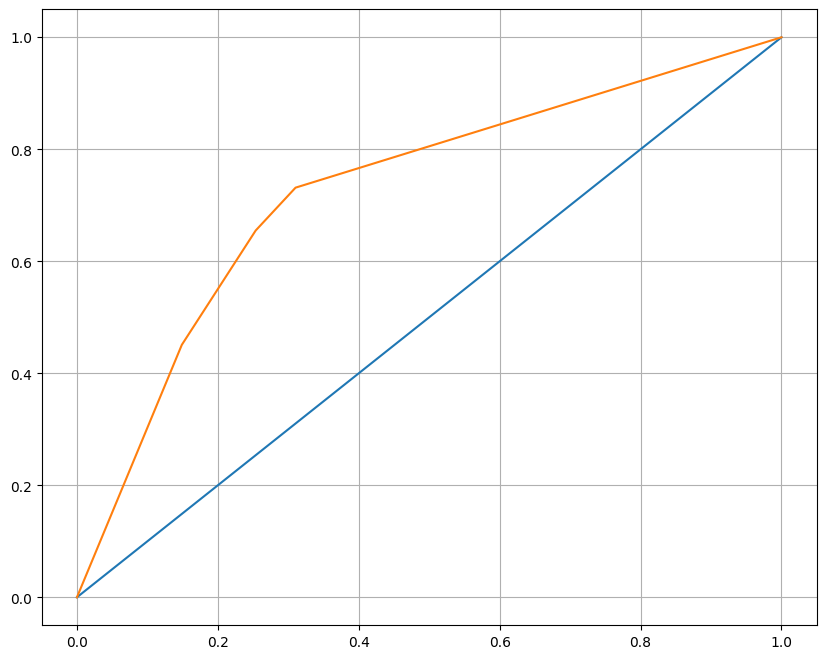

In [9]:
import matplotlib.pyplot as plt

pred_proba = wine_tree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10,8))
plt.plot([0,1], [0,1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()